### IMPORTING LIBRARIES

In [82]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas_datareader
from pandas_datareader import data as pdr
import yfinance
import pypfopt as ppo
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.discrete_allocation import DiscreteAllocation,get_latest_prices

### IMPORTING HISTORICAL DATA FROM YAHOO FINANCE (DATA COLLECTION , PORTFOLIO CONSTRUCTION)

In [83]:
end=datetime.datetime.now()
start=datetime.datetime(2010,1,1)
portfolio=['AMZN','GOOG','MSFT','NFLX','AAPL','NVDA']
data=yfinance.download(portfolio,start,end)
data.head(10)


[*********************100%%**********************]  6 of 6 completed


Adj Close                                                    \
                AAPL    AMZN       GOOG       MSFT      NFLX      NVDA   
Date                                                                     
2010-01-04  6.487533  6.6950  15.610239  23.522566  7.640000  4.240801   
2010-01-05  6.498748  6.7345  15.541497  23.530172  7.358571  4.302728   
2010-01-06  6.395381  6.6125  15.149715  23.385763  7.617143  4.330250   
2010-01-07  6.383556  6.5000  14.797037  23.142559  7.485714  4.245388   
2010-01-08  6.425997  6.6760  14.994298  23.302158  7.614286  4.254562   
2010-01-11  6.369309  6.5155  14.971633  23.005745  7.604286  4.194932   
2010-01-12  6.296857  6.3675  14.706875  22.853754  7.481429  4.052728   
2010-01-13  6.385679  6.4555  14.622441  23.066551  7.708571  4.107774   
2010-01-14  6.348693  6.3675  14.691184  23.530172  7.284286  4.043553   
2010-01-15  6.242596  6.3570  14.445853  23.454165  7.278571  3.924290   

               Close                                ...       Open             \
                AAPL    AMZN       GOOG       MSFT  ...       GOOG       MSFT   
Date                                                ...                         
2010-01-04  7.643214  6.6950  15.610239  30.950001  ...  15.615220  30.620001   
2010-01-05  7.656429  6.7345  15.541497  30.959999  ...  15.620949  30.850000   
2010-01-06  7.534643  6.6125  15.149715  30.770000  ...  15.588072  30.879999   
2010-01-07  7.520714  6.5000  14.797037  30.450001  ...  15.178109  30.629999   
2010-01-08  7.570714  6.6760  14.994298  30.660000  ...  14.744733  30.280001   
2010-01-11  7.503929  6.5155  14.971633  30.270000  ...  15.055070  30.709999   
2010-01-12  7.418571  6.3675  14.706875  30.070000  ...  14.885456  30.150000   
2010-01-13  7.523214  6.4555  14.622441  30.350000  ...  14.358431  30.260000   
2010-01-14  7.479643  6.3675  14.691184  30.959999  ...  14.542989  30.309999   
2010-01-15  7.354643  6.3570  14.445853  30.860001  ...  14.778108  31.080000   

                                 Volume                                  \
                NFLX    NVDA       AAPL       AMZN       GOOG      MSFT   
Date                                                                      
2010-01-04  7.931429  4.6275  493729600  151998000   78541293  38409100   
2010-01-05  7.652857  4.6050  601904800  177038000  120638494  49749600   
2010-01-06  7.361429  4.6875  552160000  143576000  159744526  58182400   
2010-01-07  7.731429  4.6950  477131200  220604000  257533695  50559700   
2010-01-08  7.498571  4.5900  447610800  196610000  189680313  51197400   
2010-01-11  7.660000  4.6625  462229600  175588000  289597429  68754700   
2010-01-12  7.528571  4.5050  594459600  181926000  194859654  65912100   
2010-01-13  7.612857  4.4475  605892000  214464000  260838034  51863500   
2010-01-14  7.518571  4.4225  432894000  195498000  170239717  63228100   
2010-01-15  7.245714  4.3750  594067600  307530000  218194794  79913200   

                                
                NFLX      NVDA  
Date                            
2010-01-04  17239600  80020400  
2010-01-05  23753100  72864800  
2010-01-06  23290400  64916800  
2010-01-07   9955400  54779200  
2010-01-08   8180900  47816800  
2010-01-11   6783700  55661200  
2010-01-12   6330100  62743200  
2010-01-13  14422100  50886800  
2010-01-14  17685500  60852400  
2010-01-15  13031200  81819200  

[10 rows x 36 columns]

### GETTING CLOSING PRICES FROM DATA , CREATING A COVARIENCE MATIX AND ALLOTING RANDOM WEIGHTS

In [84]:
close_data=data["Adj Close"]
returns=close_data.pct_change()
Mean_Returns=returns.mean()
Cov_Matrix=returns.cov()
weights=np.random.random(6) 
weights /= np.sum(weights)
print("Covarience Matrix is : \n\n",Cov_Matrix,"\n")
print("Weights alloted are : ",weights)

Covarience Matrix is : 

           AAPL      AMZN      GOOG      MSFT      NFLX      NVDA
AAPL  0.000318  0.000181  0.000172  0.000174  0.000170  0.000254
AMZN  0.000181  0.000436  0.000217  0.000193  0.000294  0.000274
GOOG  0.000172  0.000217  0.000298  0.000181  0.000200  0.000249
MSFT  0.000174  0.000193  0.000181  0.000269  0.000179  0.000265
NFLX  0.000170  0.000294  0.000200  0.000179  0.001048  0.000308
NVDA  0.000254  0.000274  0.000249  0.000265  0.000308  0.000805 

Weights alloted are :  [0.07132334 0.28657005 0.14540522 0.27390361 0.20401229 0.01878549]


### RUNNING SIMULATION AND CREATING VIUSLIZATION (MODEL DESIGN AND SIMULATION)

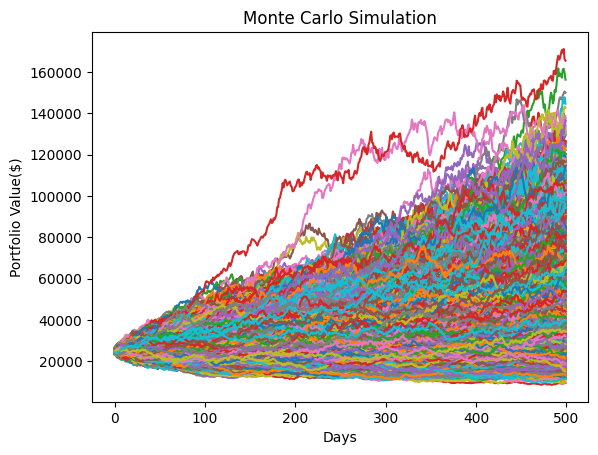

In [85]:
Simulation_number=20000
Time=500
Mean_M=np.full(shape=(Time,len(weights)),fill_value=Mean_Returns)
Mean_M=Mean_M.T
portfolio_sims=np.full(shape=(Time,Simulation_number),fill_value=0.0)
Initial_Portfolio=25000 #Dollars
for m in range(0, Simulation_number):
    Z = np.random.normal(size=(Time,6))
    L = np.linalg.cholesky(Cov_Matrix)
    dailyReturns = Mean_M + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*Initial_Portfolio
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value($)')
plt.xlabel('Days')
plt.title('Monte Carlo Simulation')
plt.show()   

### GETTING OPTIMIZED PORTFOLIO (OPTIMIZATION)

In [88]:
latest_prices = get_latest_prices(close_data)
Discrete_Allocation = DiscreteAllocation(weights, latest_prices,total_portfolio_value=10000)
allocation, leftover = Discrete_Allocation.greedy_portfolio()
print("Optimized portfolio for maximum returns : \n", allocation,"\n")
print("Funds remaining are ",leftover,'Dollar .')
print("Amount spent is ",Initial_Portfolio-leftover," Dollars. ")

Optimized portfolio for maximum returns : 
 {'AMZN': 12, 'AAPL': 10, 'MSFT': 5, 'NFLX': 4, 'NVDA': 4, 'GOOG': 13} 

Funds remaining are  96.52011108398438 Dollar .
Amount spent is  24903.479888916016  Dollars. 


### ALLOTTING CLEANED WEIGHTS AND GETTING PROJECTION OF PORTFOLIO VALUE (ANALYSIS)

In [92]:
sample_cov = risk_models.sample_cov(close_data, frequency=42)
Exp_Ret = expected_returns.capm_return(close_data)
Cov_Matrix_2=risk_models.sample_cov(close_data)
ef = EfficientFrontier(Exp_Ret, Cov_Matrix_2)
weights = ef.max_sharpe()
clean_weights = ef.clean_weights()
print("Clean weights are : \n",dict(clean_weights))
print("\nProjections: ")
ef.portfolio_performance(verbose=True)

Clean weights are : 
 {'AAPL': 0.16667, 'AMZN': 0.16667, 'GOOG': 0.16667, 'MSFT': 0.16667, 'NFLX': 0.16667, 'NVDA': 0.16667}

Projections: 
Expected annual return: 30.8%
Annual volatility: 26.2%
Sharpe Ratio: 1.10


(0.30773190077275975, 0.261855093611706, 1.09882109530176)